In [1]:
import pandas as pd
import numpy as np
import Bio
import matplotlib as mpl
import matplotlib.pyplot as plt
import gzip
from pyarrow import csv
import pyarrow.compute as pc

/home/veysel/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
vdata = pd.read_csv("2021VAERSData/2021VAERSDATA.csv.gz", encoding="iso-8859-1")
vdata.columns

/tmp/ipykernel_12118/1157934322.py:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  vdata = pd.read_csv("2021VAERSData/2021VAERSDATA.csv.gz", encoding="iso-8859-1")


Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [3]:
vdata.dtypes

VAERS_ID          int64
RECVDATE         object
STATE            object
AGE_YRS         float64
CAGE_YR         float64
CAGE_MO         float64
SEX              object
RPT_DATE         object
SYMPTOM_TEXT     object
DIED             object
DATEDIED         object
L_THREAT         object
ER_VISIT         object
HOSPITAL         object
HOSPDAYS        float64
X_STAY           object
DISABLE          object
RECOVD           object
VAX_DATE         object
ONSET_DATE       object
NUMDAYS         float64
LAB_DATA         object
V_ADMINBY        object
V_FUNDBY         object
OTHER_MEDS       object
CUR_ILL          object
HISTORY          object
PRIOR_VAX        object
SPLTTYPE         object
FORM_VERS         int64
TODAYS_DATE      object
BIRTH_DEFECT     object
OFC_VISIT        object
ER_ED_VISIT      object
ALLERGIES        object
dtype: object

In [4]:
vdata.shape

(753032, 35)

In [5]:
vdata.iloc[0]#iloc: integer based index locator [1,2]. loc is label based locator ["row_1", "col_A"]

VAERS_ID                                                   916600
RECVDATE                                               01/01/2021
STATE                                                          TX
AGE_YRS                                                      33.0
CAGE_YR                                                      33.0
CAGE_MO                                                       NaN
SEX                                                             F
RPT_DATE                                                      NaN
SYMPTOM_TEXT    Right side of epiglottis swelled up and hinder...
DIED                                                          NaN
DATEDIED                                                      NaN
L_THREAT                                                      NaN
ER_VISIT                                                      NaN
HOSPITAL                                                      NaN
HOSPDAYS                                                      NaN
X_STAY    

In [6]:
vdata = vdata.set_index("VAERS_ID")

In [7]:
vdata.loc[916600]

RECVDATE                                               01/01/2021
STATE                                                          TX
AGE_YRS                                                      33.0
CAGE_YR                                                      33.0
CAGE_MO                                                       NaN
SEX                                                             F
RPT_DATE                                                      NaN
SYMPTOM_TEXT    Right side of epiglottis swelled up and hinder...
DIED                                                          NaN
DATEDIED                                                      NaN
L_THREAT                                                      NaN
ER_VISIT                                                      NaN
HOSPITAL                                                      NaN
HOSPDAYS                                                      NaN
X_STAY                                                        NaN
DISABLE   

In [8]:
vdata.head(3)

,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
VAERS_ID,,,,,,,,,,,,,,,,,,,,,
916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,...,NaN,NaN,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish


In [9]:
vdata.iloc[:3]

,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
VAERS_ID,,,,,,,,,,,,,,,,,,,,,
916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,...,NaN,NaN,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish


In [10]:
vdata.iloc[:5, 2:4]

,AGE_YRS,CAGE_YR
VAERS_ID,,
916600,33.0,33.0
916601,73.0,73.0
916602,23.0,23.0
916603,58.0,58.0
916604,47.0,47.0


In [11]:
vdata["AGE_YRS"].max()

np.float64(119.0)

In [12]:
vdata.AGE_YRS.max()

np.float64(119.0)

<Axes: >

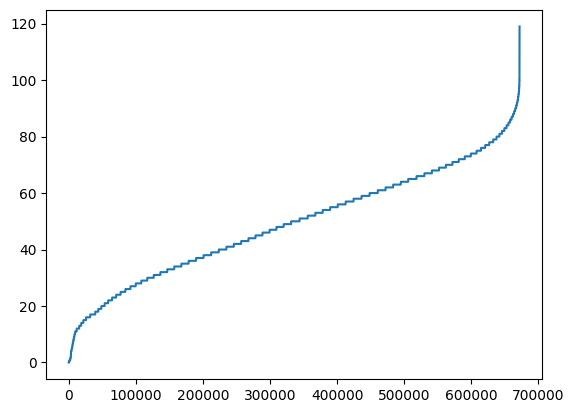

In [13]:
vdata["AGE_YRS"].sort_values().plot(use_index=False)

<Axes: ylabel='Frequency'>

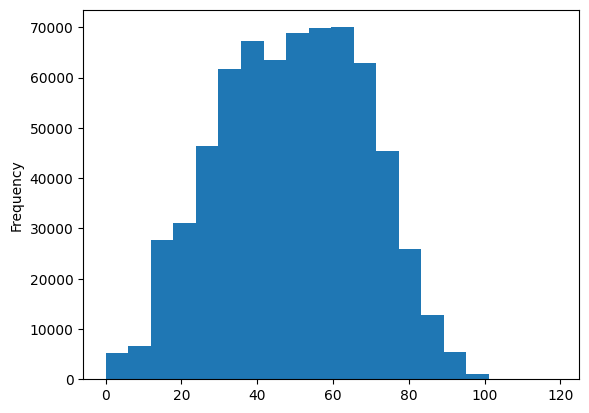

In [14]:
vdata["AGE_YRS"].plot.hist(bins=20)

<Axes: xlabel='Frequency'>

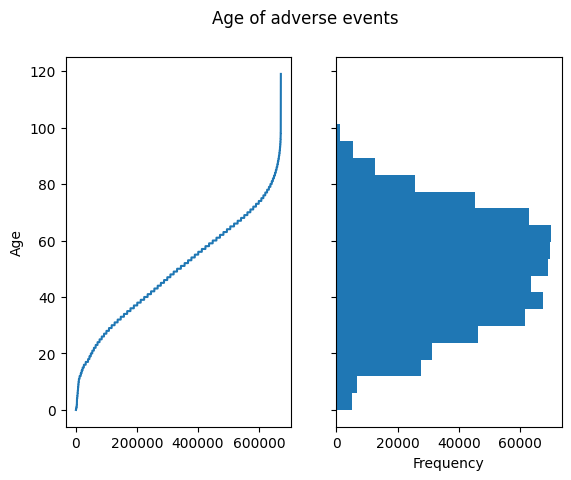

In [15]:
fig, ax = plt.subplots(1, 2, sharey=True)
fig.suptitle("Age of adverse events")
vdata["AGE_YRS"].sort_values().plot(use_index=False, ax=ax[0],xlabel="Observation", ylabel="Age")
vdata["AGE_YRS"].plot.hist(bins=20, orientation="horizontal")

In [16]:
vdata.iloc[:5, 2:4]

,AGE_YRS,CAGE_YR
VAERS_ID,,
916600,33.0,33.0
916601,73.0,73.0
916602,23.0,23.0
916603,58.0,58.0
916604,47.0,47.0


In [17]:
vdata["AGE_YRS"].dropna().apply(lambda x: int(x)).value_counts()

AGE_YRS
50     12570
65     12409
60     12234
51     12098
59     11955
       ...  
115        6
119        4
106        2
113        1
109        1
Name: count, Length: 111, dtype: int64

In [18]:
vdata.iloc[:5, 2:4]

,AGE_YRS,CAGE_YR
VAERS_ID,,
916600,33.0,33.0
916601,73.0,73.0
916602,23.0,23.0
916603,58.0,58.0
916604,47.0,47.0


In [19]:
vdata.DIED.value_counts(dropna=False)

DIED
NaN    742502
Y       10530
Name: count, dtype: int64

In [20]:
vdata["is_dead"] = (vdata.DIED == "Y")

In [21]:
vdata.head()

,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,...,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,is_dead
VAERS_ID,,,,,,,,,,,,,,,,,,,,,
916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,...,NaN,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom,False
916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy""",False
916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,...,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish,False
916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,NaN,...,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom...",False
916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,NaN,...,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na,False


In [22]:
dead = vdata[vdata.is_dead]
vax = pd.read_csv("2021VAERSData/2021VAERSVAX.csv.gz", encoding="iso-8859-1").set_index("VAERS_ID")
vax.groupby("VAX_TYPE").size().sort_values()

VAX_TYPE
DTOX            1
DTPHEP          1
H5N1            1
PNC10           1
TDAPIPV         1
            ...  
HPV9         1822
FLU4         5431
UNK          9458
VARZOS      14394
COVID19    742034
Length: 70, dtype: int64

In [23]:
vax.head()

,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
VAERS_ID,,,,,,,
910642,COVID19,PFIZER\BIONTECH,EJ1685,1,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))


In [24]:
vax19 = vax[vax.VAX_TYPE == "COVID19"]
vax19_dead = dead.join(vax19)

In [25]:
baddies = vax19_dead.groupby("VAX_LOT").size().sort_values(ascending=False)
for i, (lot, cnt) in enumerate(baddies.items()):
    print(lot, cnt, len(vax19_dead[vax19_dead.VAX_LOT ==lot].groupby("STATE")))
    if i == 10:
        break

Unknown 220 32
EN6201 157 33
unknown 127 21
EN5318 120 29
EN6200 120 22
EN6198 115 24
EL9261 111 22
EL3248 102 18
EM9810 100 21
EN6202 98 19
039K20A 97 13


In [26]:
vdata.head()

,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,...,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,is_dead
VAERS_ID,,,,,,,,,,,,,,,,,,,,,
916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,...,NaN,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom,False
916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy""",False
916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,...,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish,False
916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,NaN,...,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom...",False
916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,NaN,...,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na,False


In [27]:
vdata = pd.read_csv("2021VAERSData/2021VAERSDATA.csv.gz", encoding="iso-8859-1")
vdata.sample(frac=0.9).to_csv("vdata_sample.csv.gz", index=False)

/tmp/ipykernel_12118/2089916185.py:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  vdata = pd.read_csv("2021VAERSData/2021VAERSDATA.csv.gz", encoding="iso-8859-1")


In [28]:
vax.head()

,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
VAERS_ID,,,,,,,
910642,COVID19,PFIZER\BIONTECH,EJ1685,1,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))


In [29]:
vax = pd.read_csv("2021VAERSData/2021VAERSVAX.csv.gz", encoding="iso-8859-1")
vax.sample(frac=0.9).to_csv("vax_sample.csv.gz", index=False)

In [30]:
vdata = pd.read_csv("vdata_sample.csv.gz")
vax = pd.read_csv("vax_sample.csv.gz")
# form intersection of calling frame’s index (or column if on is specified)
# with other’s index, preserving the order of the calling’s one. 
# inner join of the individual and vaccine tables. Joins the intersections. Joins the rows have the same VAER_ID on both data
vdata_with_vax = vdata.join(vax.set_index("VAERS_ID"), on="VAERS_ID", how="inner")
len(vdata), len(vax), len(vdata_with_vax)

/tmp/ipykernel_12118/2002501374.py:1: DtypeWarning: Columns (12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  vdata = pd.read_csv("vdata_sample.csv.gz")


(677729, 717391, 645808)

In [31]:
lost_vdata = vdata[~vdata["VAERS_ID"].isin(vax["VAERS_ID"])]
len(lost_vdata)

64450

In [32]:
lost_vax = vax[~vax["VAERS_ID"].isin(vdata["VAERS_ID"])]
len(lost_vax)

71583

In [33]:
# A left outer join assures that all the rows on the left table are always represented.
# If there are no rows on the right, then all the right columns will be filled with None values.
vdata_with_vax_left = vdata.join(vax.set_index("VAERS_ID"), on="VAERS_ID")
vdata_with_vax_left.groupby("VAERS_ID").size().sort_values()

VAERS_ID
1594989     1
1594975     1
1594976     1
1594978     1
1594981     1
           ..
1147077    10
1754506    10
1908670    10
1710774    11
962303     11
Length: 677729, dtype: int64

In [34]:
dead = vdata[vdata.DIED == "Y"]
vax19 = vax[vax.VAX_TYPE == "COVID19"]
vax19_dead = vax19.join(dead.set_index("VAERS_ID"),on="VAERS_ID", how="right")
len(vax19), len(dead), len(vax19_dead)

(667806, 9476, 10713)

In [35]:
len(vax19_dead[vax19_dead.VAERS_ID.duplicated()])

1237

In [36]:
len(vax19_dead) - len(dead)

1237

# **The Key Idea About Repetition**

    Left Join: For each row in the left table, pandas tries to match on the join key(s) in the right table. If there are multiple matches in the right table for that same key, each match produces a separate result row. Consequently, the left row can be “repeated.”
    Inner Join: Only keeps rows where the join key exists in both tables, but you still get “repetitions” if the right table has multiple matching rows for a single left key.
    If the right table (which we’re keeping all rows from) has multiple rows with the same key, but the left table only has one matching row for that key, that one left row will be repeated to match each right occurrence.
    Conversely, if the left table also had multiple rows with the same key, those get matched one-to-one with every matching row in the right, potentially creating even more repeated rows.

In [37]:
vax19_dead["STATE"] = vax19_dead["STATE"].str.upper()
dead_lot = vax19_dead[["VAERS_ID", "VAX_LOT", "STATE"]].set_index(["VAERS_ID", "VAX_LOT"])
dead_lot_clean = dead_lot[~dead_lot.index.duplicated()]
dead_lot_clean = dead_lot_clean.reset_index()
dead_lot_clean[dead_lot_clean.VAERS_ID.isna()]
#The size() function in pandas, when used with groupby(), calculates and returns the size of each group. 
#It counts the number of rows within each group, irrespective of whether they contain NaN values.
baddies = dead_lot_clean.groupby("VAX_LOT").size().sort_values(ascending=False)
for i, (lot, cnt) in enumerate(baddies.items()):
    print(lot, cnt, len(dead_lot_clean[dead_lot_clean.VAX_LOT == lot].groupby("STATE")))
    if i == 10:
        break

Unknown 181 31
EN6201 131 29
unknown 95 18
EN5318 94 26
EN6200 93 21
EN6198 93 22
EL9261 91 19
EL3248 86 18
EM9810 84 18
EN6202 81 19
039K20A 78 10


In [38]:
vdata.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677729 entries, 0 to 677728
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      677729 non-null  int64  
 1   RECVDATE      677729 non-null  object 
 2   STATE         573408 non-null  object 
 3   AGE_YRS       604614 non-null  float64
 4   CAGE_YR       543889 non-null  float64
 5   CAGE_MO       3884 non-null    float64
 6   SEX           677729 non-null  object 
 7   RPT_DATE      847 non-null     object 
 8   SYMPTOM_TEXT  677204 non-null  object 
 9   DIED          9476 non-null    object 
 10  DATEDIED      8415 non-null    object 
 11  L_THREAT      9994 non-null    object 
 12  ER_VISIT      121 non-null     object 
 13  HOSPITAL      42732 non-null   object 
 14  HOSPDAYS      28062 non-null   float64
 15  X_STAY        330 non-null     object 
 16  DISABLE       10792 non-null   object 
 17  RECOVD        611704 non-null  object 
 18  VAX_

In [39]:
for name in vdata.columns:
    col_bytes = vdata[name].memory_usage(index=False, deep=True)
    col_type = vdata[name].dtype
    print(name, col_type, col_bytes // (1024 ** 2))

VAERS_ID int64 5
RECVDATE object 38
STATE object 31
AGE_YRS float64 5
CAGE_YR float64 5
CAGE_MO float64 5
SEX object 32
RPT_DATE object 20
SYMPTOM_TEXT object 440
DIED object 20
DATEDIED object 20
L_THREAT object 20
ER_VISIT object 20
HOSPITAL object 21
HOSPDAYS float64 5
X_STAY object 20
DISABLE object 20
RECOVD object 31
VAX_DATE object 36
ONSET_DATE object 36
NUMDAYS float64 5
LAB_DATA object 46
V_ADMINBY object 33
V_FUNDBY object 20
OTHER_MEDS object 43
CUR_ILL object 28
HISTORY object 42
PRIOR_VAX object 22
SPLTTYPE object 28
FORM_VERS int64 5
TODAYS_DATE object 38
BIRTH_DEFECT object 20
OFC_VISIT object 22
ER_ED_VISIT object 22
ALLERGIES object 31


In [40]:
vdata.DIED.memory_usage(index=False, deep=True)

21857896

In [41]:
vdata.DIED.fillna(False).astype(bool).memory_usage(index=False, deep=True)

677729

In [42]:
vdata["STATE"] = vdata.STATE.str.upper()
states = list(vdata["STATE"].unique())
vdata["encoded_state"] = vdata.STATE.apply(lambda state:states.index(state))
vdata["encoded_state"] = vdata["encoded_state"].astype(np.uint8)
vdata["STATE"].memory_usage(index=False, deep=True)

32582080

In [43]:
vdata["encoded_state"].memory_usage(index=False,deep=True)

677729

In [44]:
# Restrict to One Column: usecols=["STATE"]a rgument tells read_csv to only load the column 
# named "STATE" from the CSV.
states = list(pd.read_csv("vdata_sample.csv.gz", 
                          converters={"STATE": lambda state: state.upper()},
                          usecols=["STATE"])["STATE"].unique())

In [45]:
vdata = pd.read_csv("vdata_sample.csv.gz",
                    index_col="VAERS_ID",
                    converters={"DIED": lambda died: died == "Y",
                                "STATE": lambda state: states.index(state.upper())},
                    usecols=lambda name: name != "SYMPTOM_TEXT")
vdata["STATE"] = vdata["STATE"].astype(np.uint8)
vdata.info(memory_usage="deep")

/tmp/ipykernel_12118/3956661605.py:1: DtypeWarning: Columns (12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  vdata = pd.read_csv("vdata_sample.csv.gz",


<class 'pandas.core.frame.DataFrame'>
Index: 677729 entries, 1847166 to 982759
Data columns (total 33 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   RECVDATE      677729 non-null  object 
 1   STATE         677729 non-null  uint8  
 2   AGE_YRS       604614 non-null  float64
 3   CAGE_YR       543889 non-null  float64
 4   CAGE_MO       3884 non-null    float64
 5   SEX           677729 non-null  object 
 6   RPT_DATE      847 non-null     object 
 7   DIED          677729 non-null  bool   
 8   DATEDIED      8415 non-null    object 
 9   L_THREAT      9994 non-null    object 
 10  ER_VISIT      121 non-null     object 
 11  HOSPITAL      42732 non-null   object 
 12  HOSPDAYS      28062 non-null   float64
 13  X_STAY        330 non-null     object 
 14  DISABLE       10792 non-null   object 
 15  RECOVD        611704 non-null  object 
 16  VAX_DATE      627443 non-null  object 
 17  ONSET_DATE    618383 non-null  object 
 18  NUM

# **Accelerating pandas processing with Apache Arrow**
When dealing with large amounts of data, such as in whole genome sequencing, pandas is
both slow and memory-consuming. Apache Arrow provides faster and more memory-efficient
implementations of several pandas operations and can interoperate with it.

In [46]:
vdata = pd.read_csv("2021VAERSData/2021VAERSDATA.csv.gz", encoding="iso-8859-1")
columns = list(vdata.columns)

/tmp/ipykernel_12118/2694674244.py:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  vdata = pd.read_csv("2021VAERSData/2021VAERSDATA.csv.gz", encoding="iso-8859-1")


In [47]:
vdata.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753032 entries, 0 to 753031
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      753032 non-null  int64  
 1   RECVDATE      753032 non-null  object 
 2   STATE         637144 non-null  object 
 3   AGE_YRS       671943 non-null  float64
 4   CAGE_YR       604323 non-null  float64
 5   CAGE_MO       4304 non-null    float64
 6   SEX           753032 non-null  object 
 7   RPT_DATE      928 non-null     object 
 8   SYMPTOM_TEXT  752455 non-null  object 
 9   DIED          10530 non-null   object 
 10  DATEDIED      9363 non-null    object 
 11  L_THREAT      11113 non-null   object 
 12  ER_VISIT      127 non-null     object 
 13  HOSPITAL      47455 non-null   object 
 14  HOSPDAYS      31191 non-null   float64
 15  X_STAY        378 non-null     object 
 16  DISABLE       11970 non-null   object 
 17  RECOVD        679605 non-null  object 
 18  VAX_

In [48]:
vdata_arrow = csv.read_csv("2021VAERSData/2021VAERSDATA.csv.gz")
tot_bytes = sum([vdata_arrow[name].nbytes for name in vdata_arrow.column_names])
print(f"Total {tot_bytes // (1024 ** 2)} MB")

Total 691 MB


In [49]:
for name in vdata_arrow.column_names:
    arr_bytes = vdata_arrow[name].nbytes
    arr_type = vdata_arrow[name].type
    pd_bytes = vdata[name].memory_usage(index=False, deep=True)
    pd_type = vdata[name].dtype
    print(name, arr_type, arr_bytes // (1024 ** 2), pd_type, pd_bytes // (1024 ** 2),)

VAERS_ID int64 5 int64 5
RECVDATE string 10 object 42
STATE string 4 object 34
AGE_YRS double 5 float64 5
CAGE_YR int64 5 float64 5
CAGE_MO double 5 float64 5
SEX string 3 object 35
RPT_DATE string 2 object 23
SYMPTOM_TEXT binary 457 object 490
DIED string 2 object 23
DATEDIED string 2 object 23
L_THREAT string 2 object 23
ER_VISIT string 2 object 22
HOSPITAL string 2 object 23
HOSPDAYS int64 5 float64 5
X_STAY string 2 object 22
DISABLE string 2 object 23
RECOVD string 3 object 34
VAX_DATE string 9 object 40
ONSET_DATE string 9 object 40
NUMDAYS int64 5 float64 5
LAB_DATA binary 27 object 51
V_ADMINBY string 5 object 37
V_FUNDBY string 2 object 22
OTHER_MEDS binary 22 object 48
CUR_ILL binary 8 object 31
HISTORY binary 21 object 47
PRIOR_VAX binary 4 object 25
SPLTTYPE string 7 object 31
FORM_VERS int64 5 int64 5
TODAYS_DATE string 10 object 42
BIRTH_DEFECT string 2 object 22
OFC_VISIT string 3 object 25
ER_ED_VISIT string 2 object 24
ALLERGIES binary 9 object 34


In [50]:
%timeit pd.read_csv("2021VAERSData/2021VAERSDATA.csv.gz", encoding="iso-8859-1")

<magic-timeit>:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
<magic-timeit>:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
<magic-timeit>:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
<magic-timeit>:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
<magic-timeit>:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
<magic-timeit>:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
<magic-timeit>:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
<magic-timeit>:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set lo

7.7 s ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
%timeit csv.read_csv("2021VAERSData/2021VAERSDATA.csv.gz")

1.94 s ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
vdata_pd = pd.read_csv("2021VAERSData/2021VAERSDATA.csv.gz", 
                       encoding="iso-8859-1",
                       usecols=lambda x: x != "SYMPTOM_TEXT")
vdata_pd.info(memory_usage="deep")
columns.remove("SYMPTOM_TEXT")

/tmp/ipykernel_12118/741073993.py:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  vdata_pd = pd.read_csv("2021VAERSData/2021VAERSDATA.csv.gz",


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753032 entries, 0 to 753031
Data columns (total 34 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      753032 non-null  int64  
 1   RECVDATE      753032 non-null  object 
 2   STATE         637144 non-null  object 
 3   AGE_YRS       671943 non-null  float64
 4   CAGE_YR       604323 non-null  float64
 5   CAGE_MO       4304 non-null    float64
 6   SEX           753032 non-null  object 
 7   RPT_DATE      928 non-null     object 
 8   DIED          10530 non-null   object 
 9   DATEDIED      9363 non-null    object 
 10  L_THREAT      11113 non-null   object 
 11  ER_VISIT      127 non-null     object 
 12  HOSPITAL      47455 non-null   object 
 13  HOSPDAYS      31191 non-null   float64
 14  X_STAY        378 non-null     object 
 15  DISABLE       11970 non-null   object 
 16  RECOVD        679605 non-null  object 
 17  VAX_DATE      697218 non-null  object 
 18  ONSE

In [53]:
vdata_arrow = csv.read_csv("2021VAERSData/2021VAERSDATA.csv.gz",
                           convert_options=csv.ConvertOptions(include_columns=columns))
vdata_arrow.nbytes

244519661

In [54]:
vdata = vdata_arrow.to_pandas()
vdata.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753032 entries, 0 to 753031
Data columns (total 34 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      753032 non-null  int64  
 1   RECVDATE      753032 non-null  object 
 2   STATE         753032 non-null  object 
 3   AGE_YRS       671943 non-null  float64
 4   CAGE_YR       604323 non-null  float64
 5   CAGE_MO       4304 non-null    float64
 6   SEX           753032 non-null  object 
 7   RPT_DATE      753032 non-null  object 
 8   DIED          753032 non-null  object 
 9   DATEDIED      753032 non-null  object 
 10  L_THREAT      753032 non-null  object 
 11  ER_VISIT      753032 non-null  object 
 12  HOSPITAL      753032 non-null  object 
 13  HOSPDAYS      31191 non-null   float64
 14  X_STAY        753032 non-null  object 
 15  DISABLE       753032 non-null  object 
 16  RECOVD        753032 non-null  object 
 17  VAX_DATE      753032 non-null  object 
 18  ONSE

In [55]:
vdata = pd.read_csv("2021VAERSData/2021VAERSDATA.csv.gz", encoding="iso-8859-1")
vdata["STATE"] = vdata["STATE"].str.upper()
top_states = pd.DataFrame({"size": vdata.groupby("STATE").size().sort_values(ascending=False).head(5)}).reset_index()
top_states["rank"] = top_states.index
top_states = top_states.set_index("STATE")
top_vdata = vdata[vdata["STATE"].isin(top_states.index)]
top_vdata["state_code"] = top_vdata["STATE"].apply(lambda state: top_states["rank"].at[state]).astype(np.uint8)
top_vdata = top_vdata[top_vdata["AGE_YRS"].notna()]
top_vdata.loc[:,"AGE_YRS"] = top_vdata["AGE_YRS"].astype(int)
top_states

/tmp/ipykernel_12118/2348252604.py:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  vdata = pd.read_csv("2021VAERSData/2021VAERSDATA.csv.gz", encoding="iso-8859-1")
/tmp/ipykernel_12118/2348252604.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vdata["state_code"] = top_vdata["STATE"].apply(lambda state: top_states["rank"].at[state]).astype(np.uint8)


,size,rank
STATE,,
CA,69739,0
FL,41338,1
TX,40929,2
NY,38910,3
PA,25963,4


In [56]:
age_state = top_vdata[["state_code", "AGE_YRS"]]
age_state["state_code"]

0         2
1         0
4         2
5         2
12        0
         ..
753017    3
753019    4
753021    2
753022    4
753030    0
Name: state_code, Length: 198288, dtype: uint8

In [57]:
state_code_arr = age_state["state_code"].values
type(state_code_arr), state_code_arr.shape, state_code_arr.dtype

(numpy.ndarray, (198288,), dtype('uint8'))

In [58]:
age_arr = age_state["AGE_YRS"].values
type(age_arr), age_arr.shape, age_arr.dtype

(numpy.ndarray, (198288,), dtype('float64'))

In [59]:
age_state_mat = np.zeros((5,6), dtype=np.uint64)
for row in age_state.itertuples():
    age_state_mat[row.state_code, int(row.AGE_YRS//20)] += 1
age_state_mat

array([[ 5535, 17607, 21406, 16679,  2662,    24],
       [ 1601,  7151, 11258, 14650,  2762,    11],
       [ 3199, 10568, 13285,  9253,  1334,     2],
       [ 2556,  9826, 11700,  9630,  1632,    14],
       [ 1591,  6213,  8124,  6956,  1052,     7]], dtype=uint64)

In [60]:
cal = age_state_mat[0,:]
kids = age_state_mat[:,0]

In [61]:
def compute_frac(arr_1d):
    return arr_1d / arr_1d.sum()
frac_age_stat_mat = np.apply_along_axis(compute_frac, 1, age_state_mat)

In [62]:
perc_age_stat_mat = frac_age_stat_mat * 100
perc_age_stat_mat = perc_age_stat_mat.astype(np.uint8)
perc_age_stat_mat

array([[ 8, 27, 33, 26,  4,  0],
       [ 4, 19, 30, 39,  7,  0],
       [ 8, 28, 35, 24,  3,  0],
       [ 7, 27, 33, 27,  4,  0],
       [ 6, 25, 33, 29,  4,  0]], dtype=uint8)

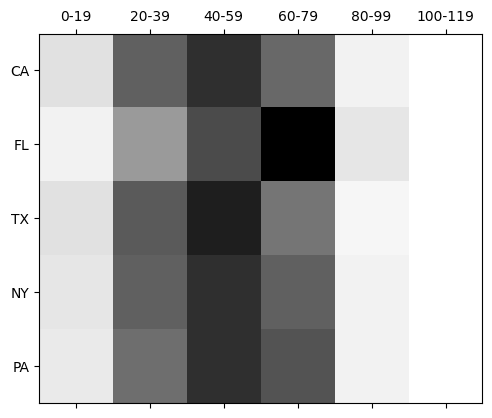

In [63]:
fig = plt.figure()
ax = fig.add_subplot()
ax.matshow(perc_age_stat_mat, cmap=plt.get_cmap("Greys"))
ax.set_yticks(range(5))
ax.set_yticklabels(top_states.index)
ax.set_xticks(range(6))
ax.set_xticklabels(["0-19", "20-39", "40-59", "60-79", "80-99", "100-119"])
fig.savefig("matrix.png")

In [64]:
vdata = pd.read_csv("2021VAERSData/2021VAERSDATA.csv.gz",
                    encoding="iso-8859-1",
                    usecols=lambda name: name != "SYMPTOM_TEXT")
num_rows = len(vdata)
perc_nan = {}
for col_name in vdata.columns:
    num_nans = len(vdata[col_name][vdata[col_name].isna()])
    perc_nan[col_name] = 100 * num_nans / num_rows
labels = perc_nan.keys()
bar_values = list(perc_nan.values())
x_positions = np.arange(len(labels))

/tmp/ipykernel_12118/671302775.py:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  vdata = pd.read_csv("2021VAERSData/2021VAERSDATA.csv.gz",


/tmp/ipykernel_12118/2043273596.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


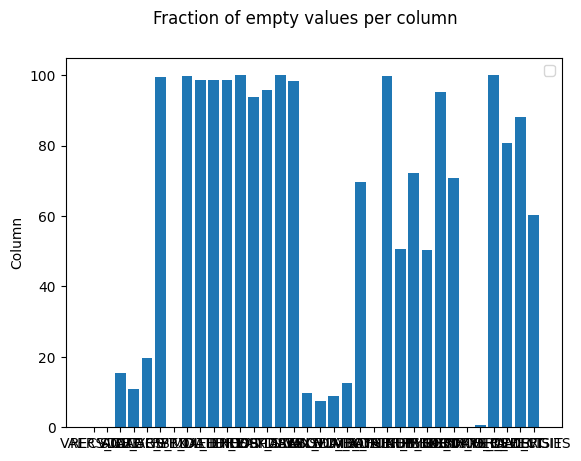

In [65]:
fig = plt.figure()
fig.suptitle("Fraction of empty values per column")
ax = fig.add_subplot()
ax.bar(x_positions, bar_values)
ax.set_ylabel("Column")
ax.set_xticks(x_positions)
ax.set_xticklabels(labels)
ax.legend()
fig.savefig("naive_chart.png")

In [66]:
fig = plt.figure(figsize=(16, 9), tight_layout=True, dpi=600)
fig.suptitle("Fraction of empty values per column", fontsize="48")
ax = fig.add_subplot()
b1 = ax.bar(x_positions, bar_values)
ax.set_ylabel("Percent of empty values", fontsize="xx-large")
ax.set_xticks(x_positions)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_ylim(0, 100)
ax.set_xlim(-0.5, len(labels))
for i, x in enumerate(x_positions):
    ax.text(x, 2, "%.1f" % bar_values[i], rotation=90, va="bottom", ha="center", backgroundcolor="white")
fig.text(0.2, 0.01, "Column", fontsize="xx-large")
fig.savefig("cleaner_chart.png")

In [87]:
dead = vdata[vdata.DIED == "Y"]
vax = pd.read_csv("2021VAERSData/2021VAERSVAX.csv.gz", encoding="iso-8859-1").set_index("VAERS_ID")
vax_dead = dead.join(vax, on="VAERS_ID", how="inner")
dead_counts = vax_dead["VAX_TYPE"].value_counts()
print("dead_counts: \n", dead_counts)
large_values = dead_counts[dead_counts >= 10]
print(large_values, large_values.shape)
other_sum = dead_counts[dead_counts < 10].sum()
print(other_sum)
large_values = pd.concat([large_values, pd.Series({"OTHER":other_sum})], axis = 0)
print(large_values, large_values.shape)
distance_df = vax_dead[vax_dead.DATEDIED.notna() & vax_dead.VAX_DATE.notna()]
distance_df["DATEDIED"] = pd.to_datetime(distance_df["DATEDIED"])
distance_df["VAX_DATE"] = pd.to_datetime(distance_df["VAX_DATE"])
distance_df = distance_df[distance_df.DATEDIED >= "2021"]
distance_df = distance_df[distance_df.VAX_DATE >= "2021"]
distance_df = distance_df[distance_df.DATEDIED >= distance_df.VAX_DATE]
time_distances = distance_df["DATEDIED"] - distance_df["VAX_DATE"]
time_distances_d = time_distances.astype(int) / (10**9 * 60 * 60 * 24)
date_died = pd.to_datetime(vax_dead[vax_dead.DATEDIED.notna()]["DATEDIED"])
date_died = date_died[date_died >= "2021"]#pd.to_datetime(2021)]
date_died_counts = date_died.value_counts().sort_index()
cum_deaths = date_died_counts.cumsum()
state_dead = vax_dead[vax_dead["STATE"].notna()][["STATE", "SEX"]]
top_states = sorted(state_dead["STATE"].value_counts().head(10).index)
top_state_dead = state_dead[state_dead["STATE"].isin(top_states)].groupby(["STATE", "SEX"]).size()#.reset_index()
top_state_dead.loc["MN", "U"] = 0 # XXXX
top_state_dead = top_state_dead.sort_index().reset_index()
top_state_females = top_state_dead[top_state_dead.SEX == "F"][0]
top_state_males = top_state_dead[top_state_dead.SEX == "M"][0]
top_state_unk = top_state_dead[top_state_dead.SEX == "U"][0]

dead_counts: 
 VAX_TYPE
COVID19       11907
UNK             185
VARZOS           51
FLU4             43
FLUX             24
PNC13            22
HEP              13
HIBV             12
DTAPIPVHIB       11
PPV               9
RV5               8
DTAPHEPBIP        7
RV1               6
HEPA              5
MMR               5
TDAP              4
DTAP              4
VARCEL            4
FLUA4             3
HPV9              3
MMRV              2
MEN               2
RAB               1
FLUC4             1
MNQ               1
FLUR4             1
MENB              1
HPV4              1
DT                1
CHOL              1
FLUC3             1
Name: count, dtype: int64
VAX_TYPE
COVID19       11907
UNK             185
VARZOS           51
FLU4             43
FLUX             24
PNC13            22
HEP              13
HIBV             12
DTAPIPVHIB       11
Name: count, dtype: int64 (9,)
71
COVID19       11907
UNK             185
VARZOS           51
FLU4             43
FLUX             24
PNC13  

/tmp/ipykernel_12118/949846505.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df["DATEDIED"] = pd.to_datetime(distance_df["DATEDIED"])
/tmp/ipykernel_12118/949846505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df["VAX_DATE"] = pd.to_datetime(distance_df["VAX_DATE"])


Text(0, 0.5, 'Deaths')

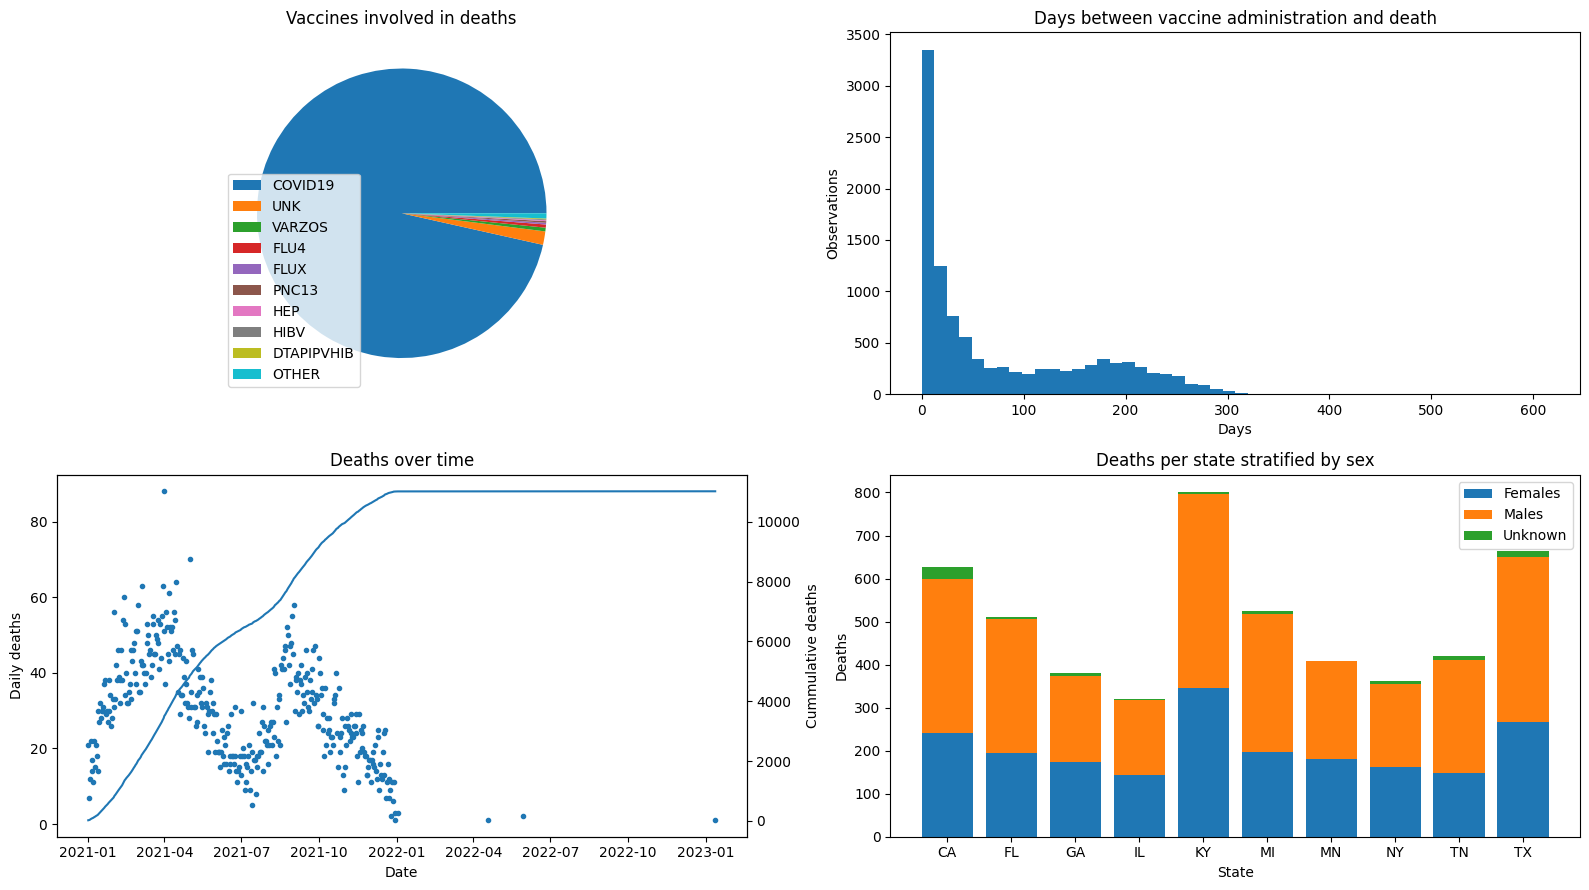

In [88]:
fig, ((vax_cnt, time_dist), (death_time, state_reps)) = plt.subplots(2, 2, 
                                                                     figsize = (16, 9), 
                                                                     tight_layout = True)
vax_cnt.set_title("Vaccines involved in deaths")
wedges, texts = vax_cnt.pie(large_values)
vax_cnt.legend(wedges, large_values.index, loc="lower left")
time_dist.hist(time_distances_d, bins=50)
time_dist.set_title("Days between vaccine administration and death")
time_dist.set_xlabel("Days")
time_dist.set_ylabel("Observations")
death_time.plot(date_died_counts.index, date_died_counts, ".")
death_time.set_title("Deaths over time")
death_time.set_ylabel("Daily deaths")
death_time.set_xlabel("Date")
tw = death_time.twinx()
tw.plot(cum_deaths.index, cum_deaths)
tw.set_ylabel("Cummulative deaths")
state_reps.set_title("Deaths per state stratified by sex") 
state_reps.bar(top_states, top_state_females, label="Females")
state_reps.bar(top_states, top_state_males, label="Males", bottom = top_state_females)
state_reps.bar(top_states, top_state_unk, label = "Unknown", 
              bottom=top_state_females.values + top_state_males.values)
state_reps.legend()
state_reps.set_xlabel("State")
state_reps.set_ylabel("Deaths")